In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/bladder cancer/ML used/NMIBC2.csv')
df

,Sample_Name,refage,sex,grade2,smkstat2,ImmunoTx,TenYearRFS,TenRFS,TenDead,TenYearSurv,...,Lymph,CD4T,CD8T,NLR,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv,RecOrProg
0,202172220017_R01C01,69,male,Grade 3 + 4,ever-smoker,With Immuno,4.109589,1,1,53.322382,...,14.1,2.5,3.6,4.730496,0.794326,0.694444,1.777778,11.000000,4.083333,yes
1,202172220017_R02C01,67,male,Grade 1 + 2,ever-smoker,Without Immuno,98.299795,1,1,98.299795,...,32.1,11.7,10.6,1.772586,0.230530,1.103774,1170.000000,34.333333,70.967742,no
2,202172220017_R03C01,69,female,Grade 1 + 2,non-smoker,With Immuno,120.000000,0,0,120.000000,...,30.9,19.1,6.5,1.977346,0.168285,2.938462,1.728571,5.500000,2.200000,no
3,202172220017_R05C01,63,male,Grade 1 + 2,ever-smoker,Without Immuno,28.043836,1,0,120.000000,...,40.9,19.1,14.4,1.359413,0.051345,1.326389,46.750000,13.400000,22.928571,yes
4,202172220017_R06C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,58.546201,1,1,58.546201,...,26.6,13.6,2.9,2.045113,0.432331,4.689655,8.769231,0.705882,4.200000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,203755070060_R03C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,17.6,9.1,3.4,3.704545,0.630682,2.676471,1.600000,5.800000,2.125000,no
599,203755070060_R04C01,60,female,Grade 1 + 2,non-smoker,Without Immuno,4.800000,1,0,120.000000,...,42.4,26.3,4.6,1.087264,0.188679,5.717391,3.781818,0.000000,2.059406,yes
600,203755070060_R05C01,50,male,Grade 1 + 2,non-smoker,Without Immuno,120.000000,0,0,120.000000,...,28.9,12.2,3.9,2.027682,0.332180,3.128205,2.666667,0.560000,1.758621,no
601,203755070060_R06C01,67,male,Grade 3 + 4,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,27.2,14.9,3.0,2.202206,0.202206,4.966667,3.138889,0.666667,2.314815,no


In [3]:
df.columns

Index(['Sample_Name', 'refage', 'sex', 'grade2', 'smkstat2', 'ImmunoTx',
       'TenYearRFS', 'TenRFS', 'TenDead', 'TenYearSurv', 'SurgToBlood',
       'SurgToBlood3', 'ProgressYN', 'RecurYN', 'Bas', 'Bmem', 'Bnv', 'CD4mem',
       'CD4nv', 'CD8mem', 'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg', 'Bas2',
       'Bmem2', 'Bnv2', 'CD4mem2', 'CD4nv2', 'CD8mem2', 'CD8nv2', 'Eos2',
       'Mono2', 'Neu2', 'NK2', 'Treg2', 'T_cell', 'Lymph', 'CD4T', 'CD8T',
       'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv', 'Tmem_to_nv',
       'RecOrProg'],
      dtype='object')

### remove the variables that are not used in training

In [4]:
df.drop(['Sample_Name','TenYearRFS', 'TenRFS','TenYearSurv', 'SurgToBlood3','ProgressYN', 'RecurYN', 'Bas', 'Bmem', 'Bnv', 'CD4mem',
       'CD4nv', 'CD8mem', 'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg','T_cell', 'Lymph', 'CD4T', 'CD8T',
       'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv', 'Tmem_to_nv','RecOrProg','Eos2'],axis=1,inplace=True)
df.columns

Index(['refage', 'sex', 'grade2', 'smkstat2', 'ImmunoTx', 'TenDead',
       'SurgToBlood', 'Bas2', 'Bmem2', 'Bnv2', 'CD4mem2', 'CD4nv2', 'CD8mem2',
       'CD8nv2', 'Mono2', 'Neu2', 'NK2', 'Treg2'],
      dtype='object')

In [5]:
df.dtypes

refage           int64
sex             object
grade2          object
smkstat2        object
ImmunoTx        object
TenDead          int64
SurgToBlood    float64
Bas2           float64
Bmem2          float64
Bnv2           float64
CD4mem2        float64
CD4nv2         float64
CD8mem2        float64
CD8nv2         float64
Mono2          float64
Neu2           float64
NK2            float64
Treg2          float64
dtype: object

### Although it is ok to have whitespace in the value in 'grade2', and 'ImmunoTx'for XGBoost and classification, we can't have any whitespace if we want to draw a tree.

In [6]:
df.replace(' ','_',regex=True, inplace=True)
df.head()

,refage,sex,grade2,smkstat2,ImmunoTx,TenDead,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
0,69,male,Grade_3_+_4,ever-smoker,With_Immuno,1,757.0,2.500,0.0,3.1,1.6,0.90,3.3,0.3,11.2,66.7,4.9,0.0
1,67,male,Grade_1_+_2,ever-smoker,Without_Immuno,1,739.0,2.700,0.5,3.3,11.7,0.01,10.3,0.3,7.4,56.9,6.0,0.0
2,69,female,Grade_1_+_2,non-smoker,With_Immuno,0,212.0,1.600,0.0,2.6,12.1,7.00,5.5,1.0,5.2,61.1,2.7,0.0
3,63,male,Grade_1_+_2,ever-smoker,Without_Immuno,0,650.0,0.600,0.0,3.6,18.7,0.40,13.4,1.0,2.1,55.6,3.8,0.0
4,61,male,Grade_1_+_2,ever-smoker,Without_Immuno,1,571.0,4.196,0.8,7.0,11.4,1.30,1.2,1.7,11.5,54.4,2.3,0.9


### The columns of data that we will use to make classifications

In [7]:
X = df.drop('TenDead',axis=1).copy()
X.head()

,refage,sex,grade2,smkstat2,ImmunoTx,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
0,69,male,Grade_3_+_4,ever-smoker,With_Immuno,757.0,2.500,0.0,3.1,1.6,0.90,3.3,0.3,11.2,66.7,4.9,0.0
1,67,male,Grade_1_+_2,ever-smoker,Without_Immuno,739.0,2.700,0.5,3.3,11.7,0.01,10.3,0.3,7.4,56.9,6.0,0.0
2,69,female,Grade_1_+_2,non-smoker,With_Immuno,212.0,1.600,0.0,2.6,12.1,7.00,5.5,1.0,5.2,61.1,2.7,0.0
3,63,male,Grade_1_+_2,ever-smoker,Without_Immuno,650.0,0.600,0.0,3.6,18.7,0.40,13.4,1.0,2.1,55.6,3.8,0.0
4,61,male,Grade_1_+_2,ever-smoker,Without_Immuno,571.0,4.196,0.8,7.0,11.4,1.30,1.2,1.7,11.5,54.4,2.3,0.9


### Turn categorical variable into continuous variables for XGBoost requirement

In [8]:
X2 = X.assign(sex = np.where(X['sex']=='male',1,2),
             grade2 = np.where(X['grade2']=='Grade_1_+_2',1,2),
             smkstat2 = np.where(X['smkstat2']=='non-smoker',1,2),
             ImmunoTx = np.where(X['ImmunoTx']=='Without_Immuno',1,2)).copy()
X2.head()

,refage,sex,grade2,smkstat2,ImmunoTx,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
0,69,1,2,2,2,757.0,2.500,0.0,3.1,1.6,0.90,3.3,0.3,11.2,66.7,4.9,0.0
1,67,1,1,2,1,739.0,2.700,0.5,3.3,11.7,0.01,10.3,0.3,7.4,56.9,6.0,0.0
2,69,2,1,1,2,212.0,1.600,0.0,2.6,12.1,7.00,5.5,1.0,5.2,61.1,2.7,0.0
3,63,1,1,2,1,650.0,0.600,0.0,3.6,18.7,0.40,13.4,1.0,2.1,55.6,3.8,0.0
4,61,1,1,2,1,571.0,4.196,0.8,7.0,11.4,1.30,1.2,1.7,11.5,54.4,2.3,0.9


In [9]:
X2.dtypes

refage           int64
sex              int64
grade2           int64
smkstat2         int64
ImmunoTx         int64
SurgToBlood    float64
Bas2           float64
Bmem2          float64
Bnv2           float64
CD4mem2        float64
CD4nv2         float64
CD8mem2        float64
CD8nv2         float64
Mono2          float64
Neu2           float64
NK2            float64
Treg2          float64
dtype: object

In [10]:
X2.describe()

,refage,sex,grade2,smkstat2,ImmunoTx,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
count,603.000000,603.000000,603.000000,603.000000,603.000000,598.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,63.159204,1.242123,1.250415,1.829187,1.147595,410.316054,1.763761,0.415423,3.503317,10.161148,2.946245,4.392617,1.919619,6.473625,62.553731,3.759449,0.257625
std,9.727749,0.428724,0.433611,0.376658,0.354993,317.480696,1.024710,0.719480,2.106616,6.535661,2.447544,3.760594,1.696386,3.053325,11.720252,2.009762,0.501842
min,29.000000,1.000000,1.000000,1.000000,1.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,35.000000,0.000000,0.000000
25%,57.000000,1.000000,1.000000,2.000000,1.000000,170.750000,1.100000,0.000000,2.000000,5.450000,1.200000,1.600000,0.600000,4.300000,55.600000,2.300000,0.000000
50%,66.000000,1.000000,1.000000,2.000000,1.000000,315.000000,1.700000,0.000000,3.200000,9.100000,2.400000,3.200000,1.500000,6.500000,62.800000,3.400000,0.000000
75%,71.000000,1.000000,1.500000,2.000000,1.000000,559.000000,2.500000,0.600000,4.600000,13.500000,4.100000,6.700000,2.800000,8.500000,70.950000,4.900000,0.300000
max,79.000000,2.000000,2.000000,2.000000,2.000000,1790.000000,4.196000,2.900000,9.600000,28.944000,10.392000,14.796000,6.500000,13.992000,94.100000,9.596000,1.996000


### The column of data that we want to predict.

In [11]:
#y = df.assign(RecOrProg = np.where(df['RecOrProg']=='yes',1,0))['RecOrProg'].copy()
y = df['TenDead'].copy()
y.head()

0    1
1    1
2    0
3    0
4    1
Name: TenDead, dtype: int64

### Now we simply split the data into training and testing sets and build the model. However, first, let's observe that this data is imbalanced by dividing the number of people who has tumor recurrence or progression, where y =1, by the total number of people in the dataset.

In [12]:
sum(y)/len(y)

0.29850746268656714

### 30% of the NMIBC patients in the dataset have deceased within 10 year. We can split using stratification in order to maintain tha same percentage of NmIBC patients who have tumor recurrence or progression in both the training set and the testing set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y,random_state=40,stratify = y,test_size=0.2)

In [14]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.2987551867219917
0.2975206611570248


In [15]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [16]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=None,seed=40)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.72843
[1]	validation_0-auc:0.74428
[2]	validation_0-auc:0.76863
[3]	validation_0-auc:0.76748
[4]	validation_0-auc:0.77729
[5]	validation_0-auc:0.77402
[6]	validation_0-auc:0.77092
[7]	validation_0-auc:0.76503
[8]	validation_0-auc:0.76144
[9]	validation_0-auc:0.78268
[10]	validation_0-auc:0.79739
[11]	validation_0-auc:0.78595
[12]	validation_0-auc:0.78301
[13]	validation_0-auc:0.78301
[14]	validation_0-auc:0.77941
[15]	validation_0-auc:0.77255
[16]	validation_0-auc:0.77189
[17]	validation_0-auc:0.77288


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-auc:0.77157
[19]	validation_0-auc:0.77157
[20]	validation_0-auc:0.77386


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=40,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### How it performms on the testing Dataset by running the Testing Dataset down the model and drawing a Confusion Matrix

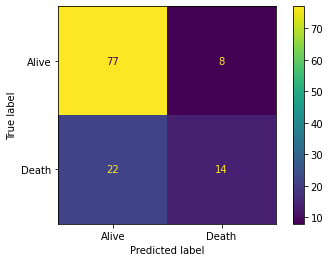

In [17]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Death'])

### 85 NMIBC patients who alived, 77 (91%) were correctly classified. And of the 36 NMIBC patients that deceased, 14 (39%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die within 10year, we would like to capture mmore of the NMIBC patients that deceased. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

# Optimize Parameters using Cross Validation and GridSearch()

In [33]:
# Round 1
param_grid = {
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.1,0.05,0.01,0.005,0.001],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[0,0.5,1.0,5.0,10],
    'scale_pos_weight':[1,3,5,7,9]
}

## To speed up cross validation, and to further prevent overfitting. We are only using a random subset of the data (90%) and are only using a random subset of the features (columns) (50%) per tree.

In [34]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params.fit(X_train,
            y_train,
            verbose = False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params.best_params_)

{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 10, 'scale_pos_weight': 1}


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### first round: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 10, 'scale_pos_weight': 1}

In [35]:
# Round 2
param_grid2 = {
    'max_depth':[6],
    'learning_rate':[0.1,0.15,0.2,0.3,0.5],
    'gamma':[0.3],
    'reg_lambda':[10,15,20,30,50],
    'scale_pos_weight':[1,1.25,1.5,2]
}

In [37]:
optimal_params2 = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid2,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params2.fit(X_train,
            y_train,
            verbose = False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params2.best_params_)

{'gamma': 0.3, 'learning_rate': 0.15, 'max_depth': 6, 'reg_lambda': 30, 'scale_pos_weight': 1}


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### second round: {'gamma': 0.3, 'learning_rate': 0.15, 'max_depth': 6, 'reg_lambda': 30, 'scale_pos_weight': 1}

# Building, Evaluating, Drawing, and interpreting the optimal XGBoost model

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_train2
X_test2 = scaler.fit_transform(X_test)
X_test2

array([[-2.43487213, -0.54870326, -0.54870326, ..., -1.01105934,
         1.25352509, -0.47817621],
       [-1.91544419, -0.54870326, -0.54870326, ...,  0.63765715,
        -0.51600345, -0.47817621],
       [ 0.88946669, -0.54870326, -0.54870326, ..., -1.68592257,
         0.32219428, -0.47817621],
       ...,
       [ 0.57780992, -0.54870326, -0.54870326, ..., -0.83166532,
         1.160392  , -0.47817621],
       [ 1.09723786, -0.54870326, -0.54870326, ..., -1.12211278,
         2.64865863, -0.47817621],
       [ 0.47392434, -0.54870326,  1.82247869, ...,  0.92810461,
        -0.79540269,  0.52824788]])

In [77]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=40,
                            gamma=0.3, learning_rate = 0.15, max_depth = 6,
                            reg_lambda=30, scale_pos_weight =2.3)
clf_xgb.fit(X_train2,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test2,y_test)])

[0]	validation_0-auc:0.76177
[1]	validation_0-auc:0.77974
[2]	validation_0-auc:0.78154
[3]	validation_0-auc:0.77941
[4]	validation_0-auc:0.77533
[5]	validation_0-auc:0.78219
[6]	validation_0-auc:0.78791
[7]	validation_0-auc:0.78791
[8]	validation_0-auc:0.79346
[9]	validation_0-auc:0.79167
[10]	validation_0-auc:0.79085
[11]	validation_0-auc:0.79101
[12]	validation_0-auc:0.79395
[13]	validation_0-auc:0.79951
[14]	validation_0-auc:0.79592
[15]	validation_0-auc:0.79559
[16]	validation_0-auc:0.79722
[17]	validation_0-auc:0.80196
[18]	validation_0-auc:0.80229
[19]	validation_0-auc:0.80556


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-auc:0.81078
[21]	validation_0-auc:0.80752
[22]	validation_0-auc:0.80784
[23]	validation_0-auc:0.80719
[24]	validation_0-auc:0.80817
[25]	validation_0-auc:0.80980
[26]	validation_0-auc:0.80621
[27]	validation_0-auc:0.81013
[28]	validation_0-auc:0.80784
[29]	validation_0-auc:0.80686
[30]	validation_0-auc:0.81144
[31]	validation_0-auc:0.81046
[32]	validation_0-auc:0.81209
[33]	validation_0-auc:0.81275
[34]	validation_0-auc:0.81176
[35]	validation_0-auc:0.81242
[36]	validation_0-auc:0.81144
[37]	validation_0-auc:0.81340
[38]	validation_0-auc:0.81601
[39]	validation_0-auc:0.81307
[40]	validation_0-auc:0.81144
[41]	validation_0-auc:0.81242
[42]	validation_0-auc:0.80882
[43]	validation_0-auc:0.81013
[44]	validation_0-auc:0.80915
[45]	validation_0-auc:0.80556
[46]	validation_0-auc:0.80686
[47]	validation_0-auc:0.80850


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=30, scale_pos_weight=2.3, seed=40,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
clf_xgb.best_ntree_limit

39

## Refit the classifier with the number of trees from the best round.

In [79]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=40,
                            gamma=0.3, learning_rate = 0.15, max_depth = 6,
                            reg_lambda=30, scale_pos_weight = 2.3,n_estimators=39)
clf_xgb.fit(X_train2,
            y_train,)

[23:02:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=39, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=30, scale_pos_weight=2.3, seed=40,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [80]:
y_pred = clf_xgb.predict_proba(X_test2)[:, 1]
roc_auc_score(y_test,y_pred)

0.8160130718954248

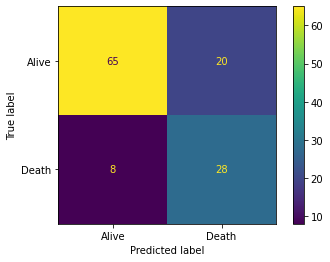

In [81]:
plot_confusion_matrix(clf_xgb,
                      X_test2, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Death'])

### 85 NMIBC patients who alived, 65 (76%) were correctly classified. And of the 36 NMIBC patients that deceased, 28 (78%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die within 10year, we would like to capture mmore of the NMIBC patients that deceased.

In [82]:
clf_xgb.feature_importances_

array([0.1500167 , 0.1027072 , 0.0459103 , 0.03207472, 0.02441208,
       0.04247569, 0.05680591, 0.03406782, 0.04355264, 0.08972374,
       0.06215218, 0.05024402, 0.04717239, 0.05628186, 0.07596856,
       0.04443973, 0.0419945 ], dtype=float32)

In [54]:
clf_xgb.importance_type

'gain'

In [55]:
clf_xgb.score(X_test2, y_test)

0.768595041322314

## Explain the model's predictions on the entire dataset

In [71]:
import shap
shap_values = shap.TreeExplainer(clf_xgb).shap_values(X2)

## SHAP Summary Plot

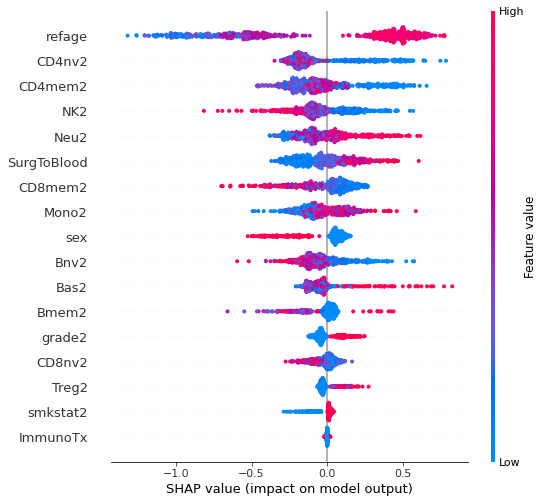

In [72]:
shap.summary_plot(shap_values, X2)

## SHAP Dependence Plots

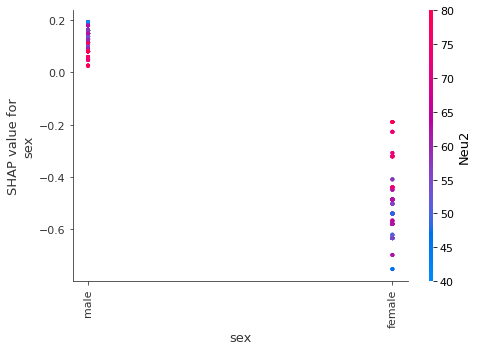

In [49]:
shap.dependence_plot("sex", shap_values, X2, display_features=X)

In [26]:
import shap
X,y = shap.datasets.nhanesi()
X_display,y_display = shap.datasets.nhanesi(display=True)

In [27]:
y

array([ 15.27465753,  11.58607306,   8.14908676, ..., -18.87716895,
       -19.68310502,  17.93858447])

In [28]:
y_display

array([ 15.27465753,  11.58607306,   8.14908676, ..., -18.87716895,
       -19.68310502,  17.93858447])